In [1]:
import pandas as pd
from scipy.stats import randint
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn import metrics 
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix

#Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data

In [2]:
#1 feladat: Töltsed be a csv-t és printeld ki az első 10 sorát!

In [3]:
heart = pd.read_csv('heart.csv')
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [4]:
#2.feladat: Cseréld ki a Sex oszlop értékeit 0-ra és 1-re!

In [5]:
heart['Sex'] = np.where(heart['Sex'] == 'F',0,1)
heart

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [6]:
#3. feladat: Nézd meg hogy az egyes oszlopokban milyen típusú adatok vannak!
# Válaszd ki azokat az oszlopokat, amik számmal jellemezhetőek, készíts egy új dataframet ezek alapján és plotold ezek korrelációját!

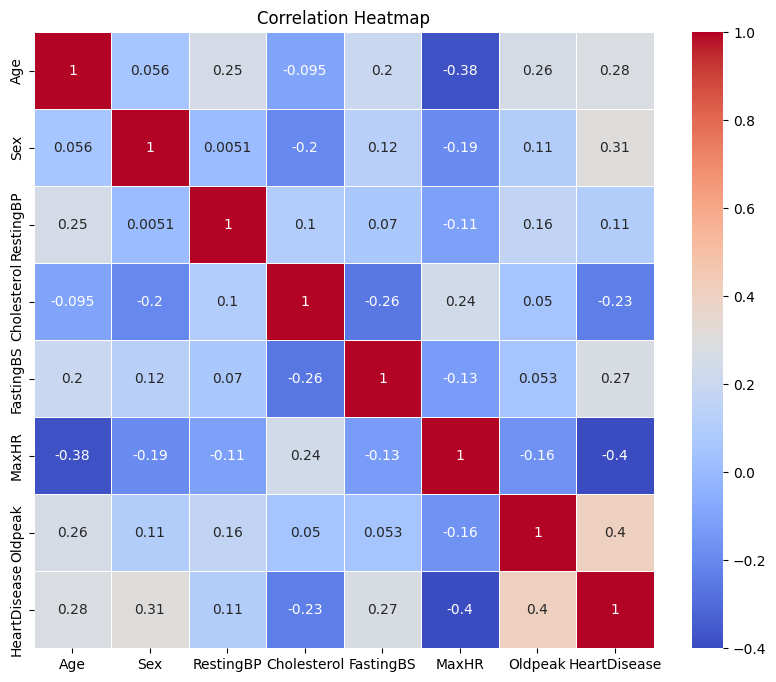

In [7]:
heart.dtypes
heart_numbers = heart.select_dtypes(include=np.number)

corr_matrix = heart_numbers.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [8]:
#4. feladat: Készíts egy hisztogrammot a 'age' oszlop alapján!

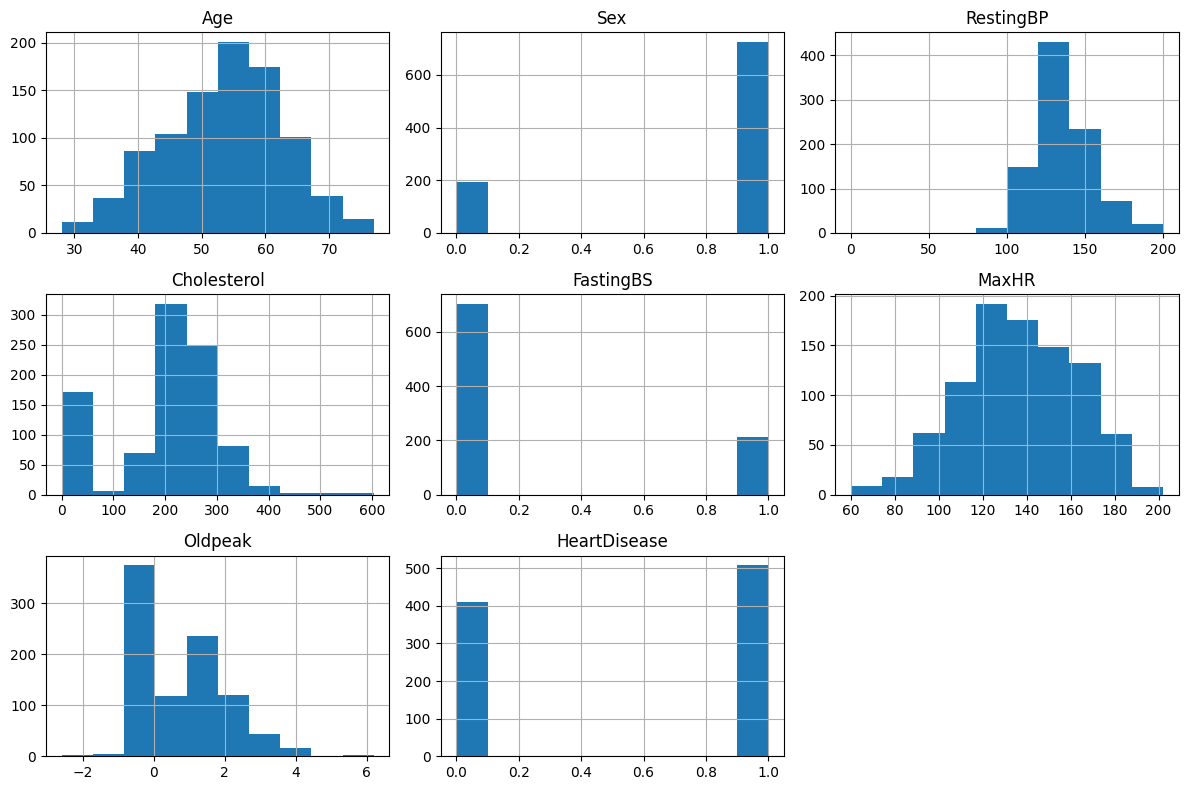

In [9]:
heart_numbers.hist(figsize=(12, 8))
plt.tight_layout()
plt.show()

In [10]:
#5.feladat: Készíts egy oszlop diagrammot amely bemutatja a nemek eloszlását!

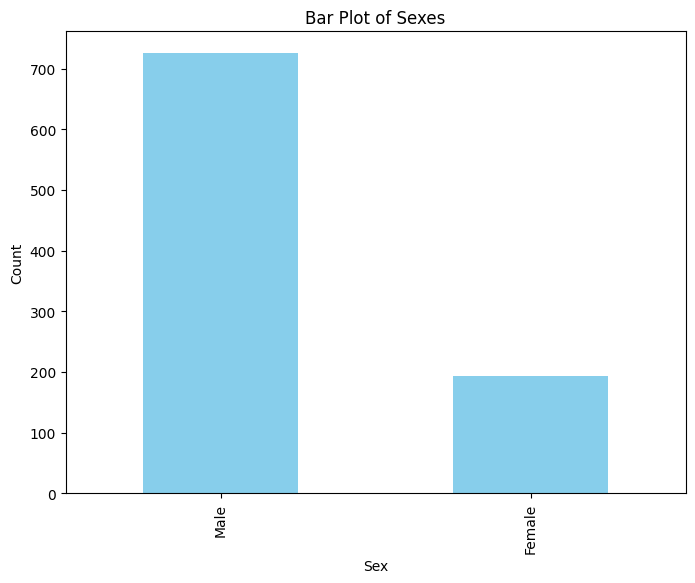

In [11]:
plt.figure(figsize=(8, 6))
heart_numbers['Sex'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Bar Plot of Sexes')
plt.xticks([0,1], ['Male','Female'])
plt.show()

In [12]:
#6. feladat: Készíts egy 'box' plotot amely megmutaja hogy a ChestPainType-okhoz milyen MaxHR eloszlás tartozik!

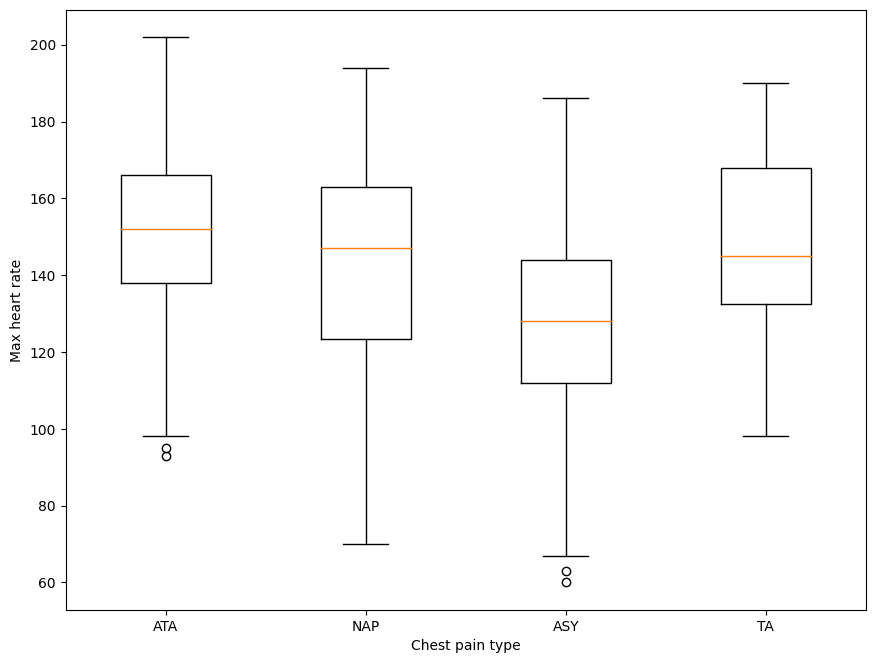

In [13]:
chest_pain_types = heart.ChestPainType.unique()

ata = heart.query("ChestPainType=='ATA'")["MaxHR"]
nap = heart.query("ChestPainType=='NAP'")["MaxHR"]
asy = heart.query("ChestPainType=='ASY'")["MaxHR"]
ta = heart.query("ChestPainType=='TA'")["MaxHR"]
data = [ata,nap,asy,ta]
fig = plt.figure(figsize=(8,6))
axes = fig.add_axes([0,0,1,1])
bp = axes.boxplot(data)
plt.xticks([1,2,3,4], ['ATA','NAP','ASY','TA'])
plt.xlabel('Chest pain type')
plt.ylabel('Max heart rate')
plt.show()

#TA : Typical Angina
#ATA : Atypical Angina
#NAP : Non-Anginal Pain,
#ASY : Asymptonic

In [14]:
#7. feladat: Néhány mondatban foglald össze, hogy milyen következtetéseket vonhatunk le az adatokból az eddigi vizualizációk alapján!
#(ha szükséges akkor készíts újabb vizualizációkat, amik szerinted hasznosak lehetnek) 

TA és ATA esetén a pulzus mindenképpen megnövekszik (legkevesebb 100 körüli pulzussal jár), illetve 
#ATA esetén fordulhat elő a legmagasabb, akár 200 feletti pulzus. NAP és ASY esetén a pulzusnövekedés 
lehet elhanyagolható is, viszont a felső szélső értékeik nincsenek lényegesen elmaradva ATA és TA-tól.
Általánosságban az NAP és ASY nem jár olyan nagy pulzusemelkedéssel, mint a TA és ATA.

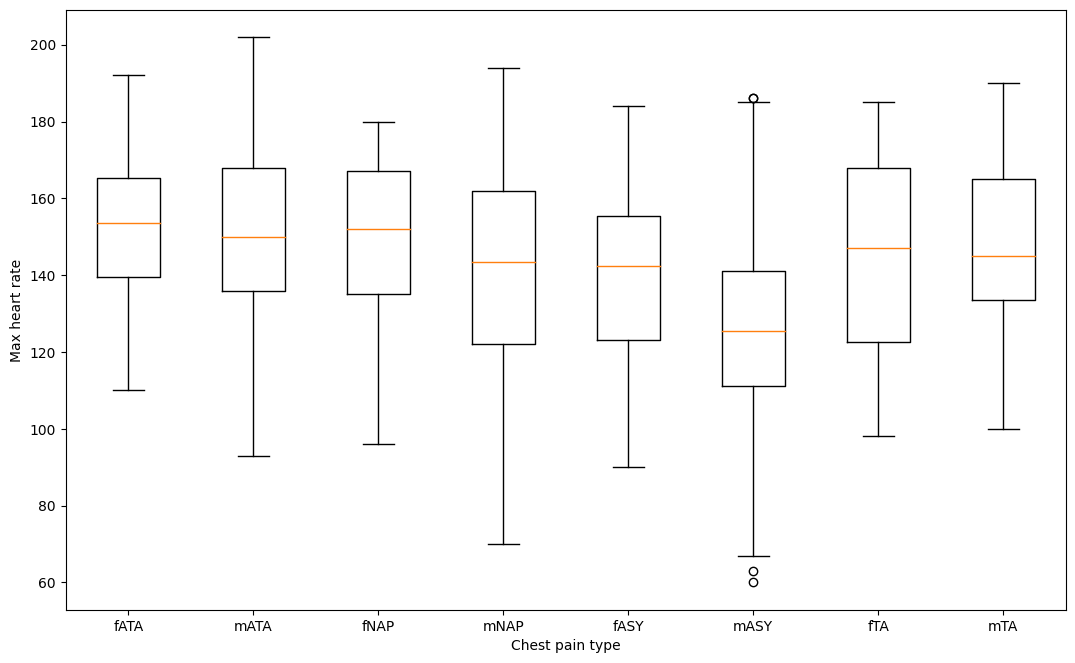

In [15]:
fata = heart.query("ChestPainType=='ATA' & Sex==0")["MaxHR"]
fnap = heart.query("ChestPainType=='NAP' & Sex==0")["MaxHR"]
fasy = heart.query("ChestPainType=='ASY' & Sex==0")["MaxHR"]
fta = heart.query("ChestPainType=='TA' & Sex==0")["MaxHR"]
mata = heart.query("ChestPainType=='ATA' & Sex==1")["MaxHR"]
mnap = heart.query("ChestPainType=='NAP' & Sex==1")["MaxHR"]
masy = heart.query("ChestPainType=='ASY' & Sex==1")["MaxHR"]
mta = heart.query("ChestPainType=='TA' & Sex==1")["MaxHR"]

data = [fata,mata,fnap,mnap,fasy,masy,fta,mta]
fig = plt.figure(figsize=(10,6))
axes = fig.add_axes([0,0,1,1])
bp = axes.boxplot(data)
plt.xticks([1,2,3,4,5,6,7,8], ['fATA','mATA','fNAP','mNAP','fASY','mASY','fTA','mTA'])
plt.xlabel('Chest pain type')
plt.ylabel('Max heart rate')
plt.show()


A TA-t leszámítva a szélső értékek különbsége nagyobb férfiak esetében, mint a nőkében. Ezzel szemben minden típusú mellkasi fájdalom átlagosan kicsit magasabb pulzussal jár nőknél, mint férfiakéban.

In [16]:
#8. feldata: Készíts egy X és egy y változót, amelyek a tanító adatokat és a HeartDisease oszlopot tartalmazzák!
#Figyelj rá, hogy csak azokat az oszlopokat válaszd ki, amelyek számmal jellemezhetőek!


In [17]:
Y = heart['HeartDisease']
X = heart.drop(['ChestPainType','RestingECG','ExerciseAngina','ST_Slope','HeartDisease'], axis='columns')

In [18]:
#9. feladat: Spliteld az adatokat train és test adatokra! (70-30 arányban)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=32)

In [20]:
#10. feladat: Taníts fel egy DecisionTreeClassifier-t a train adatokon!

In [21]:
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train,y_train)
y_pred = dtc.predict(X_test)

In [22]:
#11. feladat: Printeld ki milyen pontosságot értél el a modell segítségével!

In [23]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7137681159420289


In [29]:
#12. feladat: Taníts fel egy RandomForestClassifier-t a train adatokon, Randomized Search segítségével!
#paraméterek: 
#param_dist = {'n_estimators': np.random.randint(50,500), 'max_depth': np.random.randint(1,20)} ez nem működött mert nem iterálhatók benne az n_estimators és max_depth
param_dist = {'n_estimators': [50,100,200,300,400,500], 'max_depth': [None, 10,20,30]}

#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [35]:
rf = RandomForestClassifier()
rand_search = RandomizedSearchCV(rf,param_distributions=param_dist )
rand_search.fit(X_train,y_train)



RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [None, 10, 20, 30],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]})

In [ ]:
#13. feladat: Printeld ki a legjobb paramétereket! (n_estimators, max_depth)

In [36]:
rand_search.best_params_

{'n_estimators': 300, 'max_depth': None}

In [ ]:
#14.feladat: Prediktálj a teszt adatokra és printeld ki az accuracy-t!

In [39]:
from sklearn.metrics import accuracy_score

y_pred = rand_search.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7717391304347826


In [ ]:
#15. feladat: Készíts egy confusion matrixot a predikciók alapján!

In [43]:
confusion_mat = confusion_matrix(y_test, y_pred)
print(confusion_mat)

[[ 90  21]
 [ 42 123]]


In [49]:
#16. feladat: Vizualizáld a Random Forest modell első döntési fáját!


sklearn.ensemble._forest.RandomForestClassifier

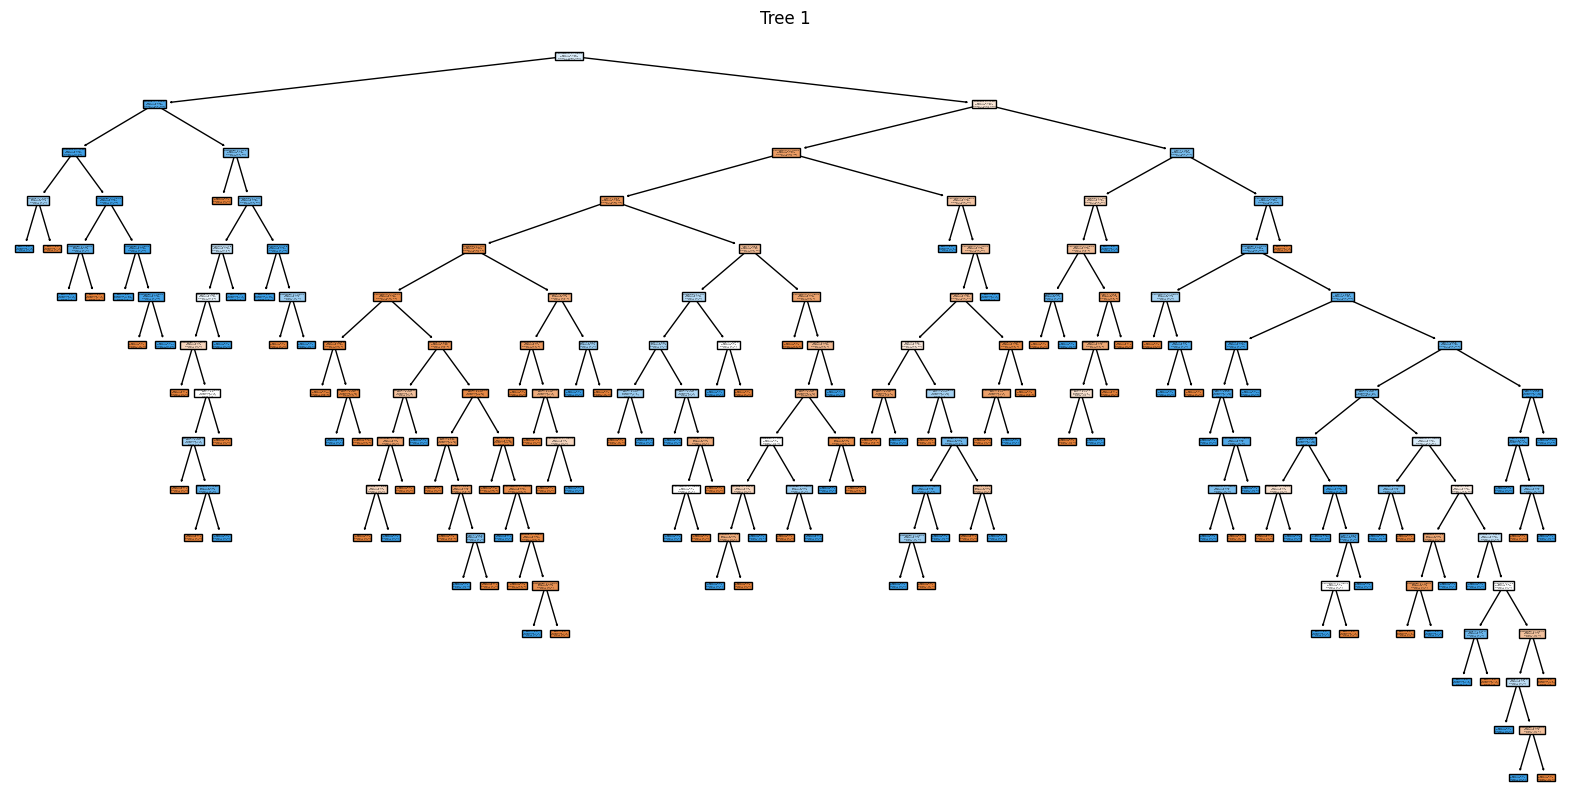

In [52]:

first_tree = rand_search.best_estimator_[0]


plt.figure(figsize=(20, 10))
plot_tree(first_tree, filled=True, feature_names=X.columns, class_names=Y.unique().astype(str))
plt.title(f"Tree 1")
    
plt.show()